In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

ordem = {'None':0, 'Low':1, 'Medium':2, 'High':3, 'Very_High':4}

df = pd.read_csv('datasets/training_data.csv', encoding='cp1252')
df_num = pd.read_csv('datasets/training_data.csv', encoding='cp1252')
df_num['AVERAGE_SPEED_DIFF'] = df_num['AVERAGE_SPEED_DIFF'].map(ordem)

In [4]:
print(len(df.columns))
df.columns

14


Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

In [16]:
df.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [18]:
df.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


In [24]:
df.duplicated().sum()

0

In [37]:
df.groupby(by=['AVERAGE_SPEED_DIFF']).agg(pd.Series.mode)

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
AVERAGE_SPEED_DIFF,,,,,,,,,,,,
High,Porto,"[2018-07-24 16:00:00, 2018-07-24 17:00:00, 201...",40.0,87.4,LIGHT,20.0,1016.0,100.0,3.0,céu claro,0.0,chuva moderada
Low,Porto,"[2018-07-24 19:00:00, 2018-07-25 13:00:00, 201...",40.4,87.9,DARK,17.0,1016.0,100.0,3.0,céu claro,0.0,chuva fraca
Medium,Porto,"[2018-07-24 15:00:00, 2018-07-25 07:00:00, 201...",37.1,88.8,LIGHT,"[19.0, 20.0]",1017.0,100.0,3.0,céu claro,0.0,chuva fraca
None,Porto,"[2018-07-24 21:00:00, 2018-07-25 00:00:00, 201...",41.9,87.0,DARK,16.0,1016.0,100.0,1.0,céu claro,0.0,chuva fraca
Very_High,Porto,"[2018-07-25 08:00:00, 2018-07-27 08:00:00, 201...",44.5,85.5,LIGHT,"[12.0, 13.0]",1017.0,100.0,2.0,céu claro,0.0,chuva fraca


<AxesSubplot:xlabel='AVERAGE_ATMOSP_PRESSURE', ylabel='AVERAGE_SPEED_DIFF'>

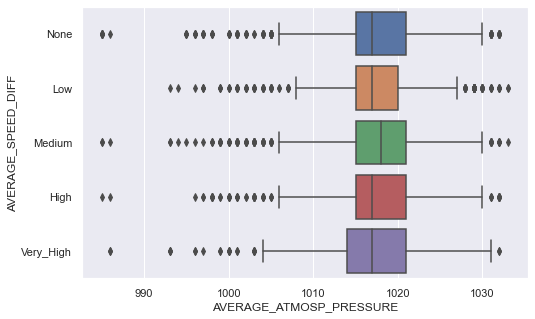

In [38]:
#Mudar x para testar outra feature
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=df['AVERAGE_ATMOSP_PRESSURE'],y=df['AVERAGE_SPEED_DIFF'], order=ordem)

<AxesSubplot:xlabel='AVERAGE_ATMOSP_PRESSURE', ylabel='count'>

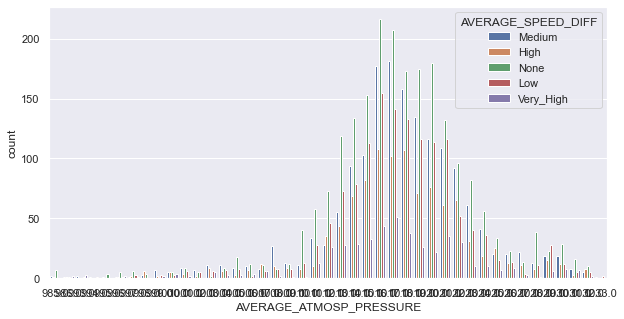

In [39]:
#Mudar x para testar outra feature
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=df['AVERAGE_ATMOSP_PRESSURE'],hue=df['AVERAGE_SPEED_DIFF'])

<AxesSubplot:xlabel='AVERAGE_CLOUDINESS', ylabel='Count'>

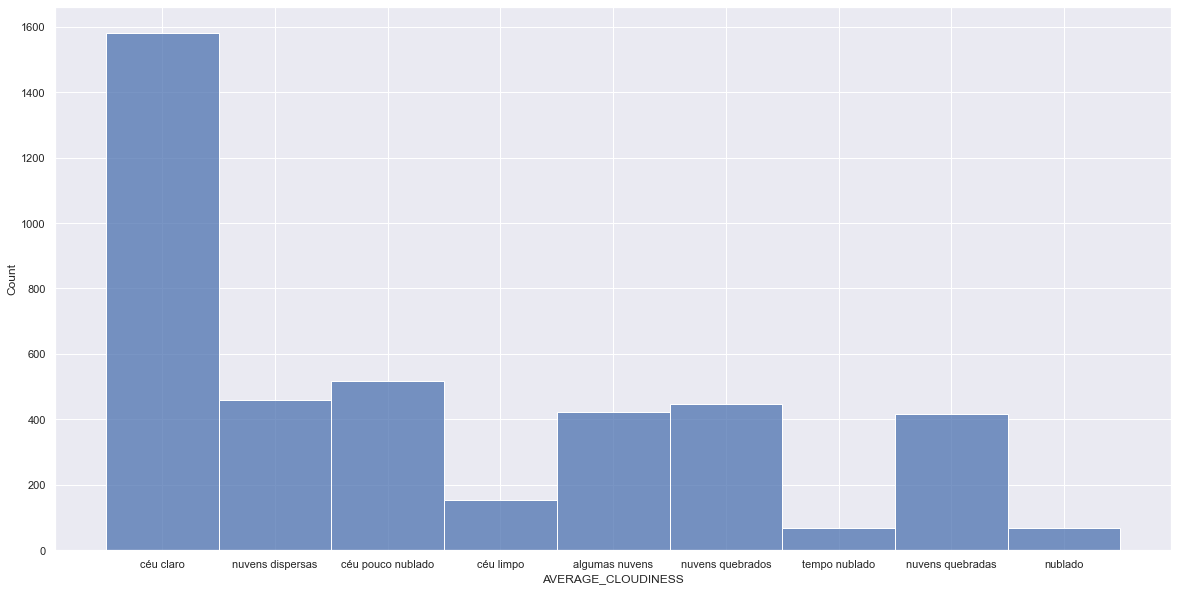

In [47]:
#Mudar feature para quantidades
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(df['AVERAGE_CLOUDINESS'])

<AxesSubplot:>

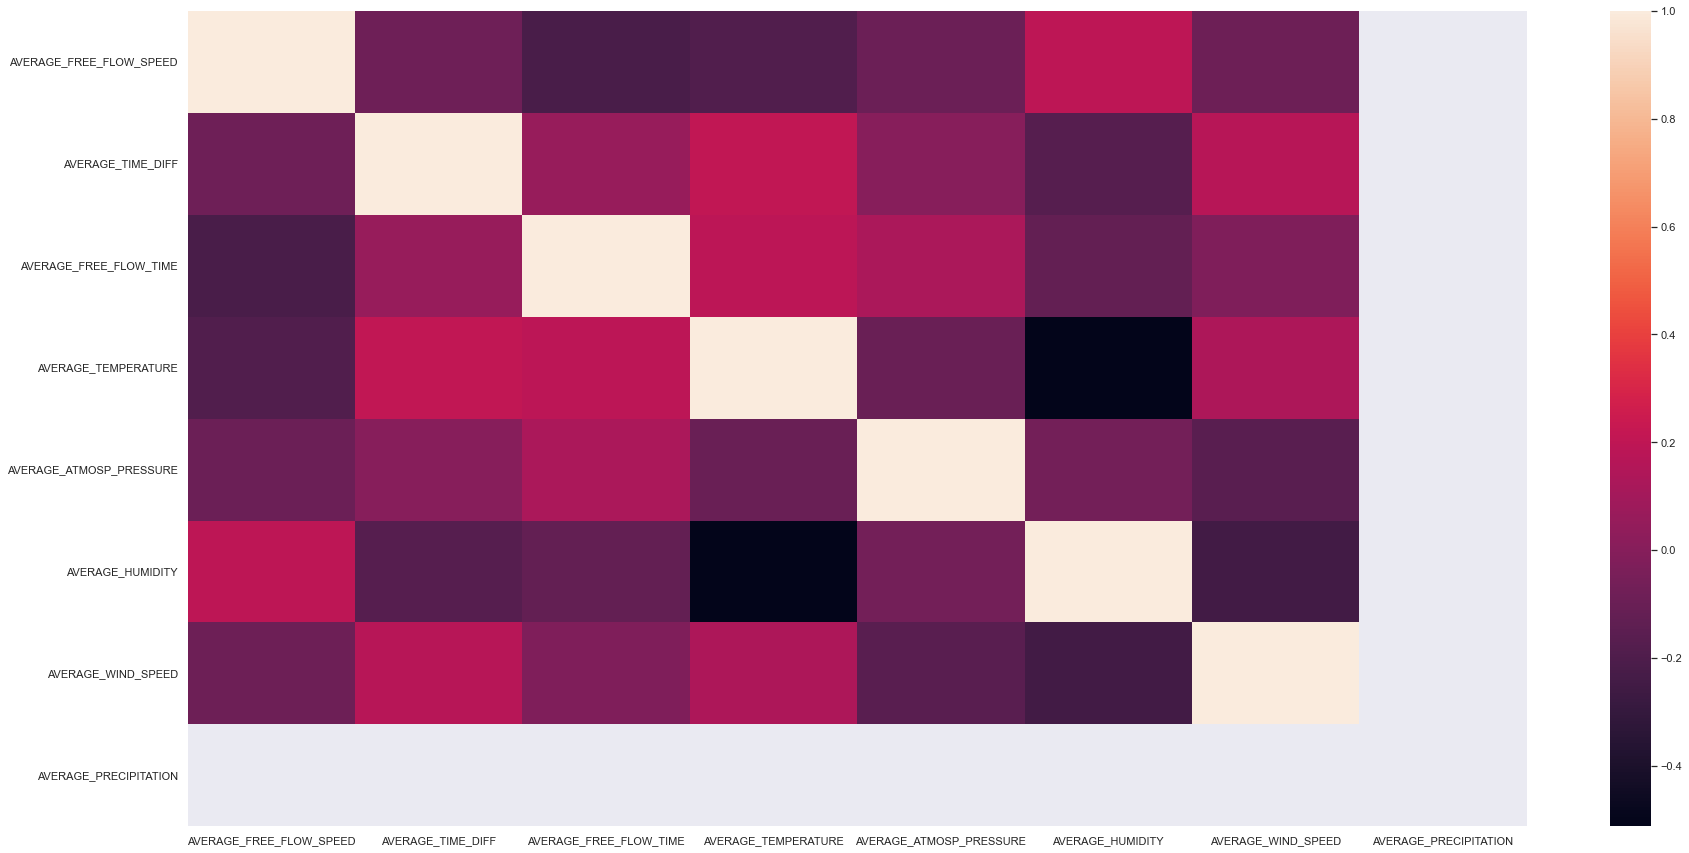

In [6]:
sns.heatmap(df.corr())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='AVERAGE_ATMOSP_PRESSURE', ylabel='AVERAGE_SPEED_DIFF'>

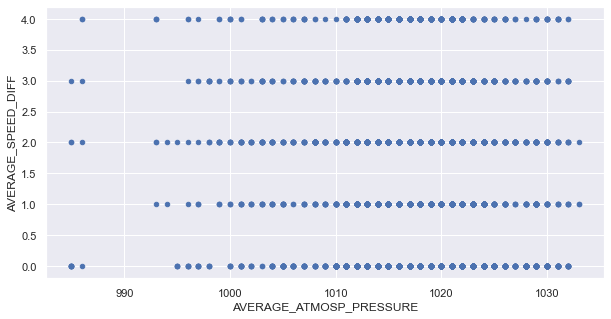

In [41]:
#Mudar x para testar outra feature
df_num.plot.scatter(x='AVERAGE_ATMOSP_PRESSURE',y='AVERAGE_SPEED_DIFF')

In [46]:
set(df['AVERAGE_CLOUDINESS'])

{'algumas nuvens',
 'céu claro',
 'céu limpo',
 'céu pouco nublado',
 nan,
 'nublado',
 'nuvens dispersas',
 'nuvens quebradas',
 'nuvens quebrados',
 'tempo nublado'}